In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv
/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip
/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import zipfile # to read zip files
from sklearn.model_selection import train_test_split


# data understanding libraries
import matplotlib.pyplot as plt # ploting library
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


# data preparation
import re
from nltk.stem import PorterStemmer


# ADS Creation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB

# Evaluation and Model Selection
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [3]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision',150)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
archive_train = zipfile.ZipFile('../input/sentiment-analysis-on-movie-reviews/train.tsv.zip')

train = pd.read_csv("../input/sentiment-analysis-on-movie-reviews/train.tsv.zip", sep='\t')
train.head(15)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [5]:
train_data, test_data = train_test_split(train, test_size=0.2, random_state=1)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=1)

train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [6]:
print("Train set size is ",len(train_data))
print("Val set size is ",len(val_data))
print("Test set size is ",len(test_data))

Train set size is  124848
Val set size is  15606
Test set size is  15606


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124848 entries, 0 to 124847
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    124848 non-null  int64 
 1   SentenceId  124848 non-null  int64 
 2   Phrase      124848 non-null  object
 3   Sentiment   124848 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [8]:
words=" ".join([row["Phrase"] for ind,row in train_data.iterrows() ]).split()

In [9]:
words_set=set(words)
len(words_set)

18177

In [10]:
labels = train_data['Sentiment'].unique()

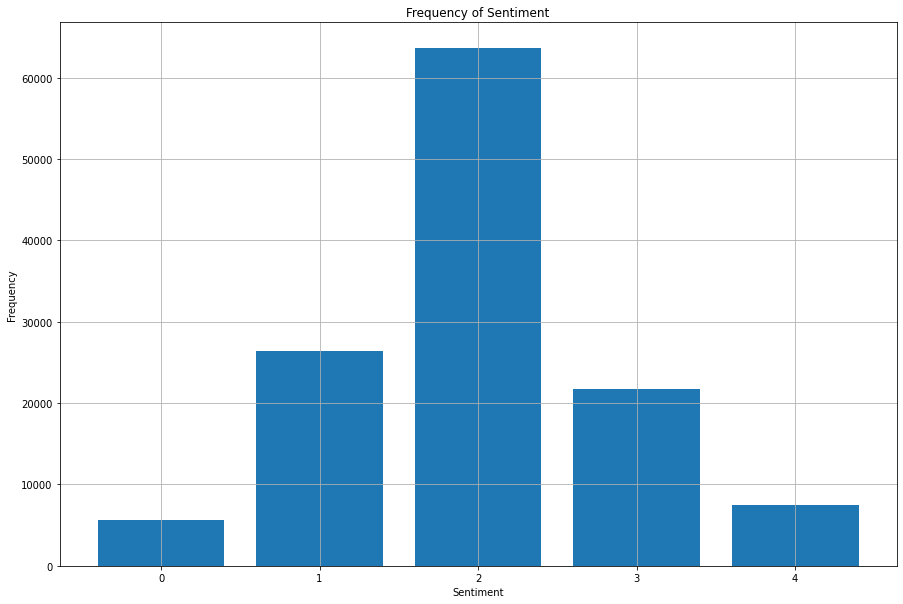

In [11]:
fig, ax = plt.subplots(figsize=(15,10)) # create the plot and specify the figure size
plt.xlabel('Sentiment') # specify the x labels
plt.ylabel('Frequency') # specify the y labels
plt.title('Frequency of Sentiment') # specify the plot title
plt.bar(labels,train_data['Sentiment'].value_counts()) # create a bar plot
plt.xticks(rotation=0) # rotate the x labels
plt.grid() # show the grid
plt.show() # show the final plot

In [12]:
# add column with num of word per phrase
train_data['Phrase_num'] = train_data["Phrase"].apply(len)

# save list of the unique numbers we have
numbers = train_data["Phrase"].apply(len).unique()

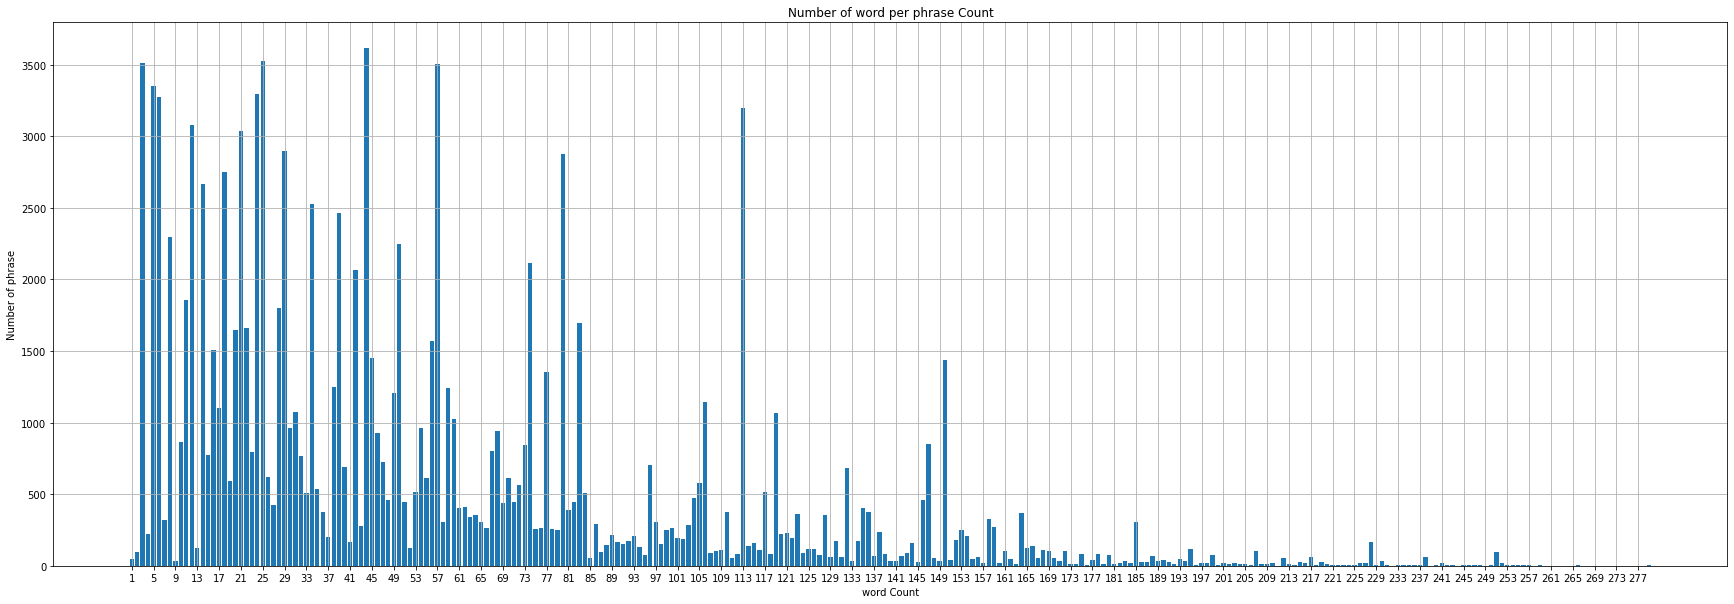

In [13]:
fig, ax = plt.subplots(figsize=(30,10))
plt.bar(numbers,train_data["Phrase_num"].value_counts().sort_index())
plt.xlabel('word Count')
plt.ylabel('Number of phrase')
plt.title('Number of word per phrase Count')
plt.xticks(np.arange(min(numbers), max(numbers)+1, 4)) # change x labels from the defult to the given range
plt.grid()
plt.show()

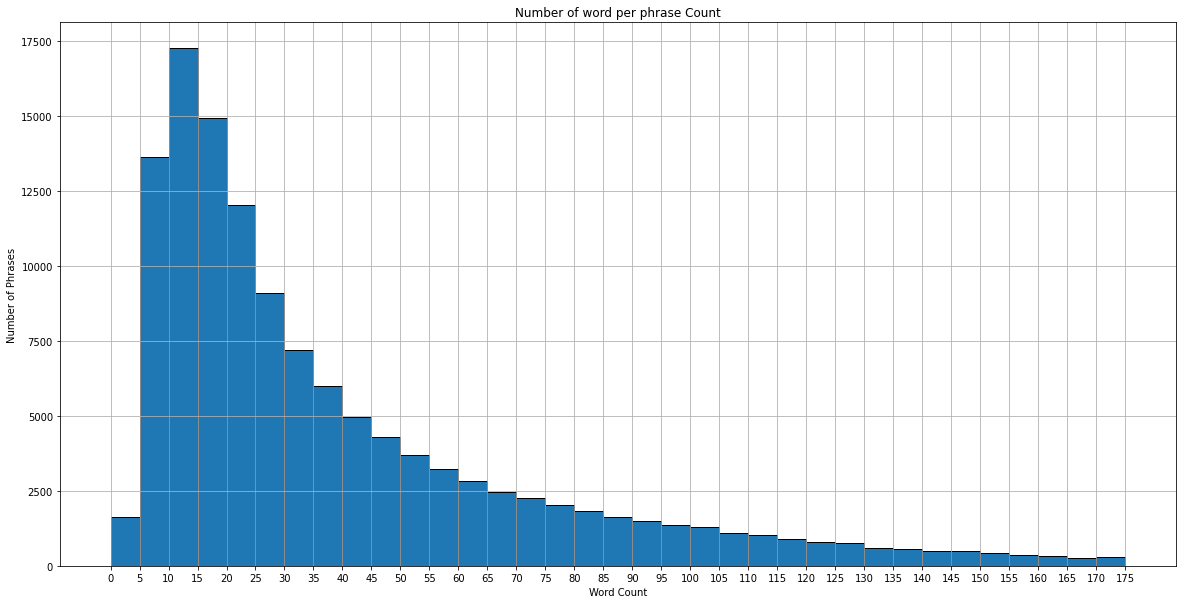

In [14]:
bins = range(0,180,5)

fig, ax = plt.subplots(figsize=(20,10))
plt.hist(train_data['Phrase_num'], bins=bins, edgecolor="k") # output a histogram plot
plt.xlabel('Word Count')
plt.ylabel('Number of Phrases')
plt.title('Number of word per phrase Count')
plt.xticks(bins) # change x labels from the defult to the given range
plt.grid()
plt.show()

In [15]:
print("There are " ,len(train_data[train_data["Phrase_num"]>130]), " phrases with word more than 130.")

There are  4990  phrases with word more than 130.


In [16]:
train_data[train_data["Phrase_num"]>130][['Phrase']]

,Phrase
46,refuses to let Slackers be seen as just anothe...
81,Although largely a heavy-handed indictment of ...
100,that this arrogant Richard Pryor wannabe 's ro...
144,filmed on the set of Carpenter 's The Thing an...
210,"'s a drawling , slobbering , lovable run-on se..."
233,especially by young Ballesta and Galan -LRB- a...
250,spoofs and celebrates the more outre aspects o...
256,Frailty '' offers chills much like those that ...
301,"The abiding impression , despite the mild hall..."
314,Broomfield reveals an ironic manifestation of ...


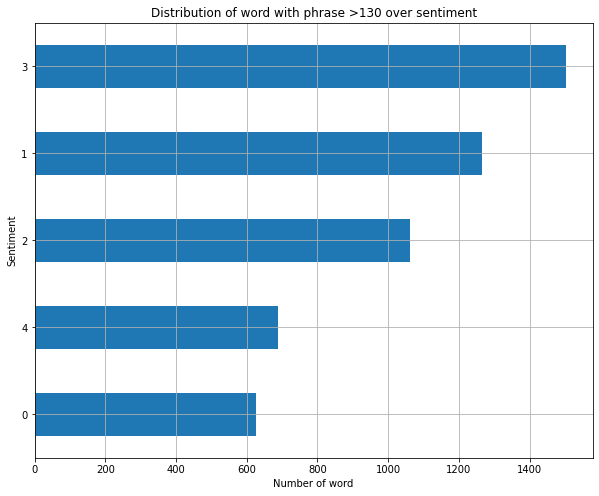

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
train_data[train_data["Phrase_num"]>=130].groupby(['Sentiment']).size().sort_values().plot(kind='barh', ax=ax)
plt.title('Distribution of word with phrase >130 over sentiment')
plt.ylabel('Sentiment')
plt.xlabel('Number of word')
plt.grid()
plt.show()

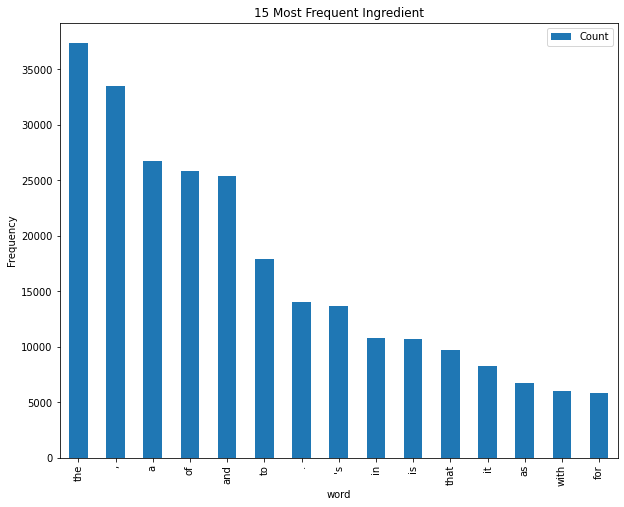

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
lst = Counter(words).most_common(15)
df = pd.DataFrame(lst, columns = ['words', 'Count'])
df.plot.bar(x='words',y='Count', ax=ax)
plt.title('15 Most Frequent Ingredient')
plt.ylabel('Frequency')
plt.xlabel('word')
plt.show()

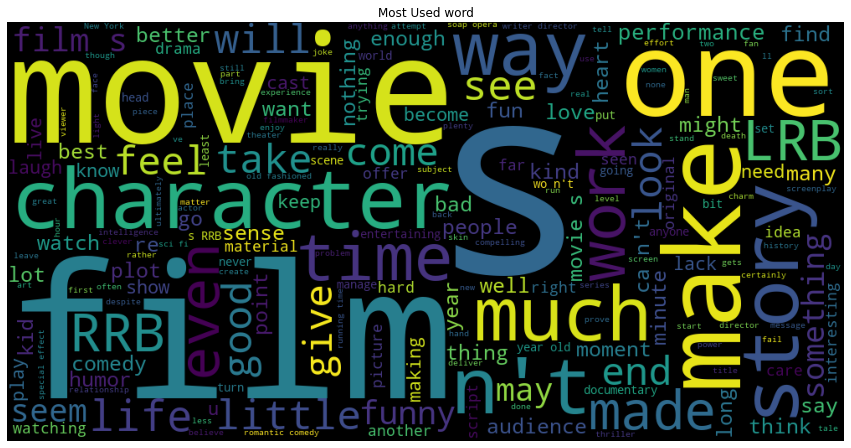

In [19]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Used word")
plt.axis("off")
plt.show()

In [20]:
train_data['SplitPhrase']=train_data['Phrase'].str.split()
train_data['SplitPhrase']

0                                               [assembled]
1                                         [a, somber, film]
2             [who, has, n't, been, living, under, a, rock]
3                                    [just, goes, to, show]
4                                 [in, a, comedic, context]
                                ...                        
124843                          [concerned, with, morality]
124844                           [into, the, editing, room]
124845                                   [pack, raw, dough]
124846                                [well-wrought, story]
124847    [as, the, main, character, suggests, ,, `, wha...
Name: SplitPhrase, Length: 124848, dtype: object

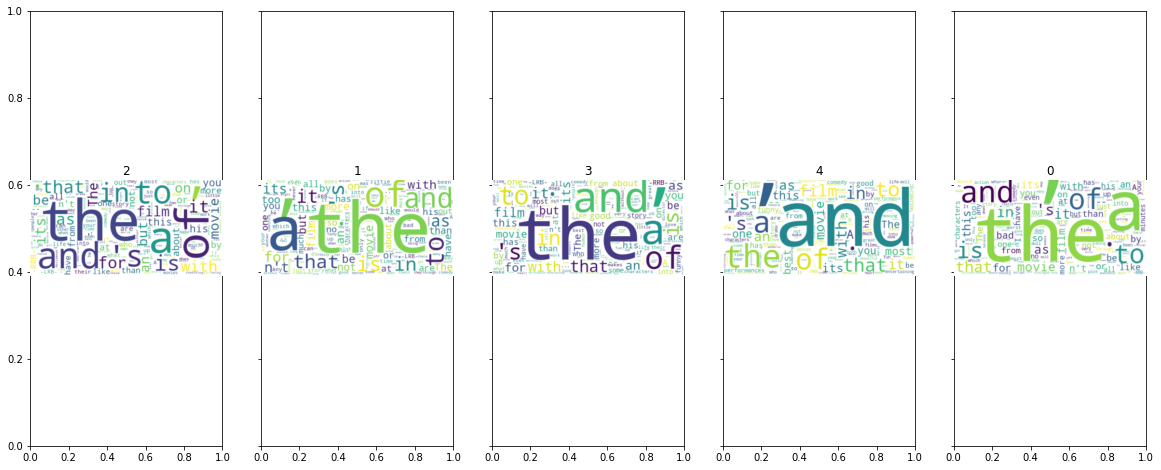

In [21]:
counters = {}
for Sentiment in train_data['Sentiment'].unique():
    counters[Sentiment] = Counter()
    indices = (train_data['Sentiment'] == Sentiment)
    for SplitPhrase in train_data[indices]['SplitPhrase']:
        counters[Sentiment].update(SplitPhrase)

fig, axes = plt.subplots(1, 5, figsize=(20, 8),sharex='col', sharey='row')
for Sentiment, ax_index in zip(counters, range(1,21)): 
    wordcloud = WordCloud(background_color="white")
    wordcloud.generate_from_frequencies(frequencies=counters[Sentiment])
    fig.add_subplot(1, 5, ax_index)    
    plt.title(Sentiment)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

In [22]:
train_data.head(30)

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_num,SplitPhrase
0,9767,406,assembled,2,9,[assembled]
1,152193,8303,a somber film,2,13,"[a, somber, film]"
2,130473,7030,who has n't been living under a rock,2,36,"[who, has, n't, been, living, under, a, rock]"
3,16939,734,just goes to show,2,17,"[just, goes, to, show]"
4,23043,1043,in a comedic context,2,20,"[in, a, comedic, context]"
5,57842,2914,crappola,1,8,[crappola]
6,17859,775,foursome,2,8,[foursome]
7,126409,6795,all audiences,2,13,"[all, audiences]"
8,123954,6655,the best of the swashbucklers,3,29,"[the, best, of, the, swashbucklers]"
9,31505,1474,black-owned record label,2,24,"[black-owned, record, label]"


In [23]:
pd.Series([s for s in words if "-" in s]).unique()

array(['black-owned', 'must-own', 'gross-out', ...,
       'revenge-of-the-nerds', 'Light-years', 'cold-fish'], dtype=object)

In [24]:
pd.Series([s for s in words if "'" in s]).unique()

array(["n't", "'s", "'ll", "'", "'re", "''", "'d", "'ve", "'em", "'m",
       "'70s", "'60s", "O'Fallon", "'80s", "'30s", "'40s", "'50s", "'n",
       "ol'", "'n'", "'til", "'90s", "C'mon", "'53", "d'etre"],
      dtype=object)

In [25]:
pd.Series([s for s in words if any(char.isdigit() for char in s)]).unique()

array(['40', 'PG-13', '18', '80', '84', '5', '102-minute', '20th-century',
       '93', '10-course', '13', 'VH1', '90', '15', '1920', '103-minute',
       '88-minute', '1', '2002', '3D', '129-minute', '3000', '20', '800',
       '75', '2', '9\\/11', '50-million', '13th', '1960', '10th-grade',
       '21\\/2', '95', '51', '30-year', '1958', '83', '1986', '4',
       '24\\/7', '100', '3', 'under-7', "'70s", '1950', '10', '1970',
       '50', '50-year', '1950s', "'60s", '163', '1972', '14-year-old',
       '1994', '1962', '50s', '101', '451', '85', '110', '30', '1995',
       '1991', '1899', '8-year-old', '91-minute', '86', '2-day', '146',
       '20-car', '1915', '48', '52', '22-year-old', '18-year-old',
       '19th-century', '7th', '1987', '1993', '9', '1\\/2', '1959',
       '1937', '1970s', '1984', '95-minute', '100-year', '51st', '72',
       '1933', "'80s", '2,500', '19th-Century', '1.8', '72-year-old',
       '300', '21st', 'Catch-22', '98', '9-11', '10-year-old', "'30s",
       "

In [26]:
pd.Series([s for s in words if "," in s]).unique()

array([',', '2,500', '10,000', '20,000'], dtype=object)

In [27]:
pd.Series([s for s in words if "." in s]).unique()

array(['.', 'Mr.', '...', 'J.K.', 'No.', 'Vs.', 'etc.', 'X.', 'Q.', 'R.',
       'feardotcom.com', 'Mrs.', 'H.G.', 'E.T.', 'Bros.', 'L.', 'M.',
       'J.', 'i.e.', 'Ms.', 'P.T.', 'N.M.', 'Jr.', 'A.', 'W.', 'al.',
       'F.', 'U.N.', 'o.k.', 'I.Q.', '1.8', 'D.', 'U.', 'vs.', 'T.',
       'E.T', 'Inc.', 'C.H.O.', 'C.', 'P.O.W.', 'L.A.', 'G.', 'P.C.',
       'O.K.', 'A.E.W.', 'U.S.', 'S.C.', '1.2', 'S.', 'V.S.', 'J.R.R.',
       'M.I.T.', 'Dr.', 'D.J.', 'A.C.', 'O.', 'b.s.', 'P.O.V.', 'D.W.',
       'Sept.', 'Wash.', 'K.', 'A.S.', 'Co.', 'no.', 'C.I.'], dtype=object)

In [28]:
pd.Series([s for s in words if re.findall('[^a-zA-Z]',re.sub(r'[^\w\s]','',s))]).unique()

array(['40', 'PG-13', '18', '80', '84', '5', '102-minute', '20th-century',
       '93', '10-course', '13', 'VH1', '90', '15', '1920', '103-minute',
       '88-minute', '1', '2002', '3D', '129-minute', '3000', '20', '800',
       '75', '2', '9\\/11', '50-million', '13th', '1960', '10th-grade',
       '21\\/2', '95', '51', '30-year', '1958', '83', '1986', '4',
       '24\\/7', '100', '3', 'under-7', "'70s", '1950', '10', '1970',
       '50', '50-year', '1950s', "'60s", '163', '1972', '14-year-old',
       '1994', '1962', '50s', '101', '451', '85', '110', '30', '1995',
       '1991', '1899', '8-year-old', '91-minute', '86', '2-day', '146',
       '20-car', '1915', '48', '52', '22-year-old', '18-year-old',
       '19th-century', '7th', '1987', '1993', '9', '1\\/2', '1959',
       '1937', '1970s', '1984', '95-minute', '100-year', '51st', '72',
       '1933', "'80s", '2,500', '19th-Century', '1.8', '72-year-old',
       '300', '21st', 'Catch-22', '98', '9-11', '10-year-old', "'30s",
       "

In [29]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_num,SplitPhrase
0,9767,406,assembled,2,9,[assembled]
1,152193,8303,a somber film,2,13,"[a, somber, film]"
2,130473,7030,who has n't been living under a rock,2,36,"[who, has, n't, been, living, under, a, rock]"
3,16939,734,just goes to show,2,17,"[just, goes, to, show]"
4,23043,1043,in a comedic context,2,20,"[in, a, comedic, context]"


In [30]:
porter = PorterStemmer()
# lancaster=LancasterStemmer()

def ret_words(SplitPhrase):
    word_text=' '.join(SplitPhrase)
    word_text = word_text.replace('-', ' ')
    word_text = word_text.replace('.', '')
    word_text = word_text.replace(',', '')
    word_text= word_text.lower()

    final=[]
    for ana in word_text.split():
        if re.findall('[0-9]', ana): continue
        if re.findall('[^a-zA-Z]',re.sub(r'[^\w\s]','',ana)): continue
        if len(ana) > 0: final.append(porter.stem(re.sub(r'[^\w\s]','',ana)))
    return ' '.join(final)

def preprocess(df,flag):

    # Convert list of ingredients to string
    df['words'] = df['Phrase'].str.split().apply(ret_words)
    
    return df

In [31]:
train_preprocessed = preprocess(train_data,0)
val_preprocessed = preprocess(val_data,1)
test_preprocessed = preprocess(test_data,1)

In [32]:
train_preprocessed.head(100)

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_num,SplitPhrase,words
0,9767,406,assembled,2,9,[assembled],assembl
1,152193,8303,a somber film,2,13,"[a, somber, film]",a somber film
2,130473,7030,who has n't been living under a rock,2,36,"[who, has, n't, been, living, under, a, rock]",who ha nt been live under a rock
3,16939,734,just goes to show,2,17,"[just, goes, to, show]",just goe to show
4,23043,1043,in a comedic context,2,20,"[in, a, comedic, context]",in a comed context
5,57842,2914,crappola,1,8,[crappola],crappola
6,17859,775,foursome,2,8,[foursome],foursom
7,126409,6795,all audiences,2,13,"[all, audiences]",all audienc
8,123954,6655,the best of the swashbucklers,3,29,"[the, best, of, the, swashbucklers]",the best of the swashbuckl
9,31505,1474,black-owned record label,2,24,"[black-owned, record, label]",black own record label


In [33]:
len(set(pd.Series(' '.join([row["words"] for ind,row in train_preprocessed.iterrows()]).split(' '))))

10650

In [34]:
id_train, X_train, y_train = train_preprocessed['PhraseId'], train_preprocessed['words'], train_preprocessed['Sentiment']
id_test, X_test, y_test = test_preprocessed['PhraseId'], test_preprocessed['words'], test_preprocessed['Sentiment']

In [35]:
# BoW
BoW = CountVectorizer()

BoW.fit(X_train)
Count_data = BoW.transform(X_train)

BoW_X_train = pd.DataFrame(Count_data.toarray(),columns=BoW.get_feature_names())

BoW_X_train

,aaa,aaliyah,aan,abagnal,abandon,abbass,abbott,abbrevi,abc,abderrahman,abdul,abel,abhor,abhorr,abid,abil,abject,abl,abli,abomin,aborigin,abort,abound,about,abov,abras,abridg,abroad,abrupt,absenc,absent,absolut,absorb,absorpt,abstract,absurd,absurdist,absurdli,abund,abundantli,abus,abysm,abyss,ac,academ,academi,accent,accentu,accept,access,accid,accident,acclaim,accommod,accomod,accompani,accomplish,accord,account,accumul,accur,accuraci,accus,ace,acerb,ach,achero,achiev,achingli,achiv,achronolog,acid,ackerman,acknowledg,acolyt,acquaint,acquir,acr,acrid,across,act,action,actioncomedi,actionthril,activ,activist,actor,actordirector,actori,actorish,actorli,actress,actual,actuari,acumen,acut,ad,adag,adam,adapt,add,addam,addict,addit,address,adept,adequ,adher,adject,adjust,administr,admir,admiss,admit,admittedli,ado,adobo,adolesc,adopt,ador,adorn,adren,adrenalin,adrian,adrien,adrift,adroit,adult,adulteri,advanc,advantag,adventu,adventur,advers,advert,advertis,advic,advis,advocaci,aerial,aesop,aesthet,aew,affabl,affair,affect,affectingli,affection,affin,affirm,affleck,afflict,affluenc,affluent,afford,afghan,afghani,aficionado,afloat,afraid,africa,african,after,afterlif,aftermath,afternoon,afterschool,aftertast,afterthought,afterward,again,against,agap,age,agecom,agenc,agenda,agent,ager,agey,aggrand,aggrav,aggress,agil,agit,agitprop,agnost,ago,agon,agoni,agre,agreeabl,agreement,aground,ah,ahead,ahem,ahola,ai,aid,aiello,ailment,aim,aimless,aimlessli,air,aircraft,airhead,airi,airless,aisl,akin,al,ala,alabama,alacr,aladdin,alagna,alain,alan,alarm,albeit,album,alcatraz,alchem,aldrich,aleck,alert,alexand,alexandr,alfonso,alfr,ali,alia,alic,alien,alik,aliv,all,alleg,allegedli,allegi,allegori,allen,alli,allison,allow,allur,allus,almodovar,...,who,whodunit,whole,wholesal,wholesom,wholli,whom,whoop,whoope,whoosh,whop,whose,wick,wickedli,wide,widen,wider,widescreen,widget,widow,widowmak,wiel,wierzbicki,wife,wig,wiggl,wilco,wild,wildcard,wildean,wilder,wildest,wildli,wildlif,will,willi,william,willing,willingli,wilson,wimmer,wimp,win,winc,wind,window,windshield,windtalk,wine,wing,winger,wink,winner,winningli,winter,wintri,wire,wireless,wisdom,wise,wiseacr,wisecrack,wisegirl,wiseman,wiser,wish,wishi,wisp,wispi,wist,wit,witch,with,wither,witherspoon,withhold,within,without,withstand,witless,wittgenstein,witti,wittier,wive,wizard,wizardri,wizen,wladyslaw,wo,wobbl,woe,woefulli,wolf,wollter,woman,womanhood,women,won,wonder,wonderland,wondrou,wondrous,wong,wonton,woo,wood,woodard,wooden,woodi,woodland,woodman,woolf,woolli,woozi,word,wordi,wordless,wore,work,workabl,workaday,worker,workman,workmanlik,workout,workplac,workshop,world,worldli,worm,worn,worri,wors,worship,worst,worth,worthi,worthless,worthwhil,would,wound,woven,wow,wrap,wrath,wreak,wreck,wreckag,wrench,wrestl,wrestler,wretch,wretchedli,wri,wrinkl,wrist,write,writer,writerdirector,written,wrong,wrote,wrought,wryli,ww,wwii,wyman,xerox,xiaoshuai,xma,xtc,xxx,ya,yahoo,yakusho,yale,yang,yank,yard,yarn,yasujiro,yawn,yawner,ye,yeah,year,yearn,yell,yellow,yep,yesterday,yesteryear,yet,yi,yiddish,yield,yo,yoda,yong,york,yorker,yosuk,you,young,younger,youngster,your,yourself,yourselv,youth,yu,yuen,yung,yuppi,yvan,zaidan,zani,zap,zaza,ze,zeal,zealand,zealous,zeitgeist,zelda,zellweg,zemecki,zen,zero,zest,zeu,zhang,zhao,zhuangzhuang,zigzag,zing,zinger,zip,zipper,zippi,zish,ziyi,zoe,zombi,zone,zooland,zoom,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [36]:
X_train.head()

0                             assembl
1                       a somber film
2    who ha nt been live under a rock
3                    just goe to show
4                  in a comed context
Name: words, dtype: object

In [37]:
BoW.fit(X_train.head())
Count_data = BoW.transform(X_train.head())
BoW_X_train = pd.DataFrame(Count_data.toarray(),columns=BoW.get_feature_names())
BoW_X_train

,assembl,been,comed,context,film,goe,ha,in,just,live,nt,rock,show,somber,to,under,who
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,1
3,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
# TFIDF
TFIDF = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.25, norm='l2', encoding='latin-1',\
                ngram_range=(1, 2), stop_words='english')

TFIDF.fit(X_train)
Count_data = TFIDF.transform(X_train)
TFIDF_X_train = pd.DataFrame(Count_data.toarray(),columns=TFIDF.get_feature_names())


TFIDF_X_train

,aaliyah,abagnal,abagnal antic,abandon,abandon hope,abandon polit,abandon script,abandon theater,abbass,abbass underst,abbott,abbott ernest,abbrevi,abbrevi favor,abc,abdul,abdul malik,abel,abel ferrara,abhor,abhorr,abid,abid impress,abil,abil bore,abil document,abil human,abil imag,abil maintain,abil make,abil shock,abil spoof,abil startl,abil think,abject,abject suffer,abl,abl accomplish,abl better,abl creep,abl enjoy,abl forgiv,abl look,abl muster,abl overcom,abl perform,abl project,abl share,abl stomach,abl tear,abl visual,abli,abli intercut,abomin,abomin mean,aborigin,aborigin aspect,abort,abort attempt,abound,abov,abov anyth,abov averag,abov credibl,abov disgust,abov easi,abov ilk,abov kiddi,abov level,abov manhattan,abov materi,abov mediocr,abov ordinari,abov paint,abov pat,abov playwrit,abov rest,abov run,abov similar,abov stale,abras,abras styliz,abridg,abridg edit,abroad,abrupt,abrupt drop,abrupt turn,absenc,absenc narr,absent,absolut,absolut amaz,absolut complet,absolut delight,absolut earn,absolut essenti,absolut rave,absolut sens,absolut thing,absorb,absorb charact,absorb larg,absorb look,absorb manner,absorb perform,absorb piec,absorb women,absorpt,absorpt insist,abstract,abstract approach,abstract excruciatingli,abstract frank,abstract guilt,abstract surfac,abstract term,absurd,absurd collect,absurd contriv,absurd final,absurd inconsist,absurd length,absurd modern,absurd plot,absurd premis,absurdist,absurdist observ,absurdist wit,absurdli,absurdli inappropri,absurdli overblown,absurdli simplist,abund,abund human,abund suppli,abundantli,abus,abus infidel,abysm,abysm hannib,abyss,ac,ac help,academ,academ lower,academ skullduggeri,academi,academi award,academi flick,academi love,accent,accent mud,accent perform,accent rrb,accent uma,accentu,accept,accept anoth,accept charact,accept entertain,accept life,accept nasti,accept news,accept occasion,accept print,accept role,accept teen,accept trial,accept way,accept year,access,access ballot,access famili,access haunt,access introduct,access massoud,access non,access screed,accid,accid prone,accident,accident spi,acclaim,acclaim everi,acclaim screen,accommod,accommod fit,accomod,accomod practic,accompani,accompani didact,accompani thi,accomplish,accomplish actress,accomplish decept,accomplish film,accomplish hi,accomplish oscar,accomplish primari,accomplish verac,accomplish work,accord,accord press,account,account work,accumul,accumul enjoy,accumul layer,accur,accur anyth,accur depict,accur movi,accuraci,accuraci observ,accus,accus bit,accus make,ace,ace ventura,acerb,acerb laugh,acerb reparte,ach,ach confus,ach end,ach sad,achero,achero mana,achiev,achiev best,achiev callow,achiev complex,achiev epic,achiev feel,achiev honest,achiev kind,achiev level,achiev main,achiev modest,achiev near,achiev onli,achiev popular,achiev practic,achiev time,achingli,achingli enthral,achingli honest,achingli human,achingli real,...,wrong make,wrong moment,wrong perform,wrong place,wrong thank,wrong thi,wrong thing,wrong time,wrong turn,wrote,wrote gibson,wrote rocki,wrote script,wrote shakespear,wrote thi,wrought,wrought hypothesi,wrought stori,wryli,wryli amus,ww,wwii,wwii flick,wyman,wyman june,xerox,xerox machin,xma,xtc,xxx,xxx flex,ya,ya member,ya sisterhood,ya themselv,ya ya,yakusho,yakusho alway,yale,yale grad,yang,yank,yank whenev,yard,yarn,yarn guess,yarn hold,yarn noth,yarn spinner,yasujiro,yasujiro ozu,yawn,yawn admir,yawn chasm,yawn dure,ye,ye enter,ye right,ye snail,ye spirit,year,year affair,year age,year ago,year alreadi,year best,year breathless,year come,year condit,year costli,year crime,year delay,year effort,year eloqu,year end,year enjoy,year friendship,year greatest,year ha,year hole,year includ,year intrigu,year lame,year late,year later,year lrb,year mean,year nt,year old,year psychedel,year radar,year russian,year tri,year version,year year,yearn,yearn adventur,yearn day,yell,yell face,yellow,yellow streak,yesterday,yesterday feel,yesterday news,yesteryear,yi,yiddi

In [39]:
X_train.head(5)

0                             assembl
1                       a somber film
2    who ha nt been live under a rock
3                    just goe to show
4                  in a comed context
Name: words, dtype: object

In [40]:
TFIDF = TfidfVectorizer()
TFIDF.fit(X_train.head(5))
Count_data = TFIDF.transform(X_train.head(5))
TFIDF_X_train = pd.DataFrame(Count_data.toarray(),columns=TFIDF.get_feature_names())


TFIDF_X_train

,assembl,been,comed,context,film,goe,ha,in,just,live,nt,rock,show,somber,to,under,who
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.707,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.707,0.000,0.000,0.000
2,0.000,0.378,0.000,0.000,0.000,0.000,0.378,0.000,0.000,0.378,0.378,0.378,0.000,0.000,0.000,0.378,0.378
3,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.500,0.000,0.000,0.000,0.500,0.000,0.500,0.000,0.000
4,0.000,0.000,0.577,0.577,0.000,0.000,0.000,0.577,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [41]:
id_train, X_train, y_train = train_preprocessed['PhraseId'], train_preprocessed['words'], train_preprocessed['Sentiment']
id_val, X_val, y_val = val_preprocessed['PhraseId'], val_preprocessed['words'], val_preprocessed['Sentiment']
id_test, X_test, y_test = test_preprocessed['PhraseId'], test_preprocessed['words'], test_preprocessed['Sentiment']

In [42]:
LR_clf_counts = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression(random_state=0, max_iter=2000))
])
LR_clf_counts.fit(X_train, y_train)
LR_cnt_pred_tr = LR_clf_counts.predict(X_train)

print(accuracy_score(y_train, LR_cnt_pred_tr))
print(precision_score(y_train, LR_cnt_pred_tr, average='weighted'))

0.7013888888888888
0.6960132041584891


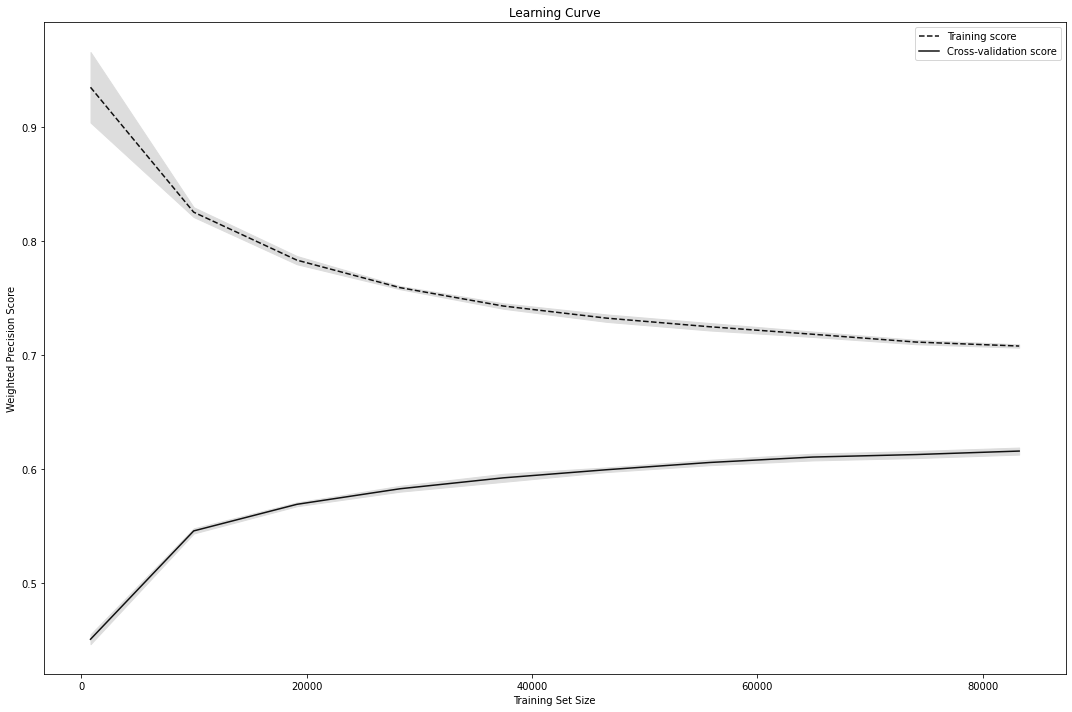

In [43]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LR_clf_counts, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='precision_weighted',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(15,10))
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [44]:
SVM_clf_counts = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LinearSVC(max_iter=3000))
])
SVM_clf_counts.fit(X_train, y_train)
SVM_cnt_pred_tr = SVM_clf_counts.predict(X_train)

print(accuracy_score(y_train, SVM_cnt_pred_tr))
print(precision_score(y_train, SVM_cnt_pred_tr, average='weighted'))

0.6998349993592208
0.6945355052866312


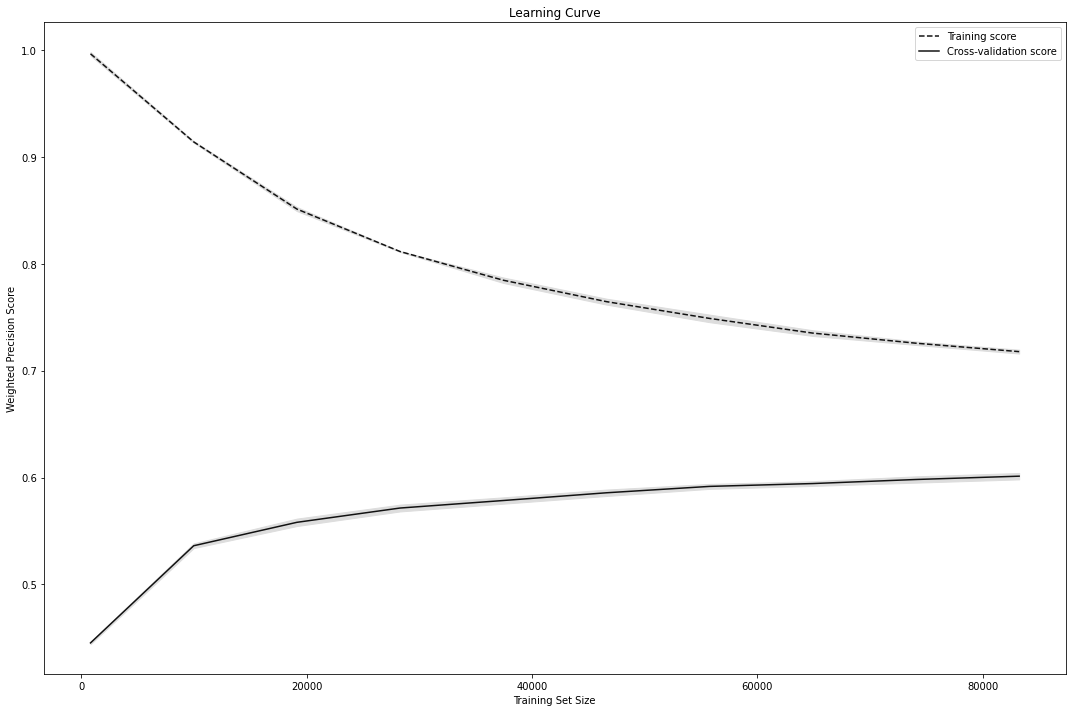

In [45]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVM_clf_counts, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='precision_weighted',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(15,10))
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [46]:
NB_clf_counts = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])
NB_clf_counts.fit(X_train, y_train)
NB_cnt_pred_tr = NB_clf_counts.predict(X_train)

print(accuracy_score(y_train, NB_cnt_pred_tr))
print(precision_score(y_train, NB_cnt_pred_tr, average='weighted'))

0.6603549916698706
0.6489523383064809


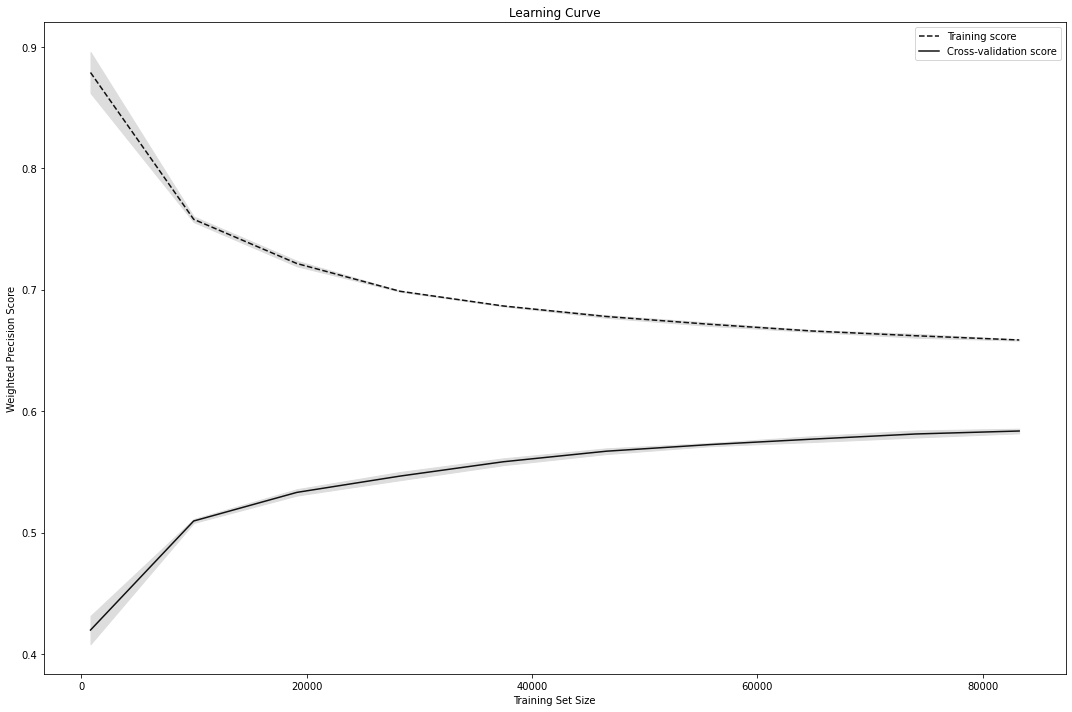

In [47]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(NB_clf_counts, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='precision_weighted',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(15,10))
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [48]:
LR_clf_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.25, norm='l2', encoding='latin-1',ngram_range=(1, 2), stop_words='english')),
    ('clf', LogisticRegression(random_state=0, max_iter=2000))
])
LR_clf_tfidf.fit(X_train, y_train)
LR_tfidf_pred_tr = LR_clf_tfidf.predict(X_train)

print(accuracy_score(y_train, LR_tfidf_pred_tr))
print(precision_score(y_train, LR_tfidf_pred_tr, average='weighted'))

0.7171600666410355
0.716436479967157


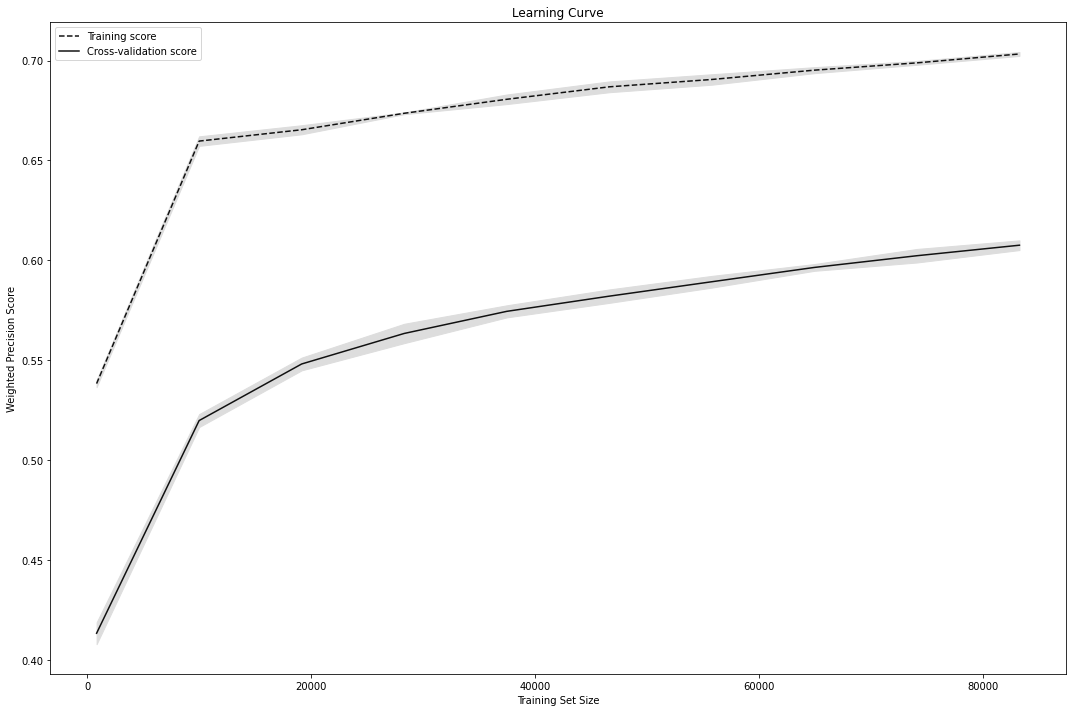

In [49]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LR_clf_tfidf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='precision_weighted',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(15,10))
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [50]:
SVM_clf_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.25, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')),
    ('clf', LinearSVC( max_iter=2000))
])
SVM_clf_tfidf.fit(X_train, y_train)
SVM_tfidf_pred_tr = SVM_clf_tfidf.predict(X_train)

print(accuracy_score(y_train, SVM_tfidf_pred_tr))
print(precision_score(y_train, SVM_tfidf_pred_tr, average='weighted'))

0.7777777777777778
0.7740759070578971


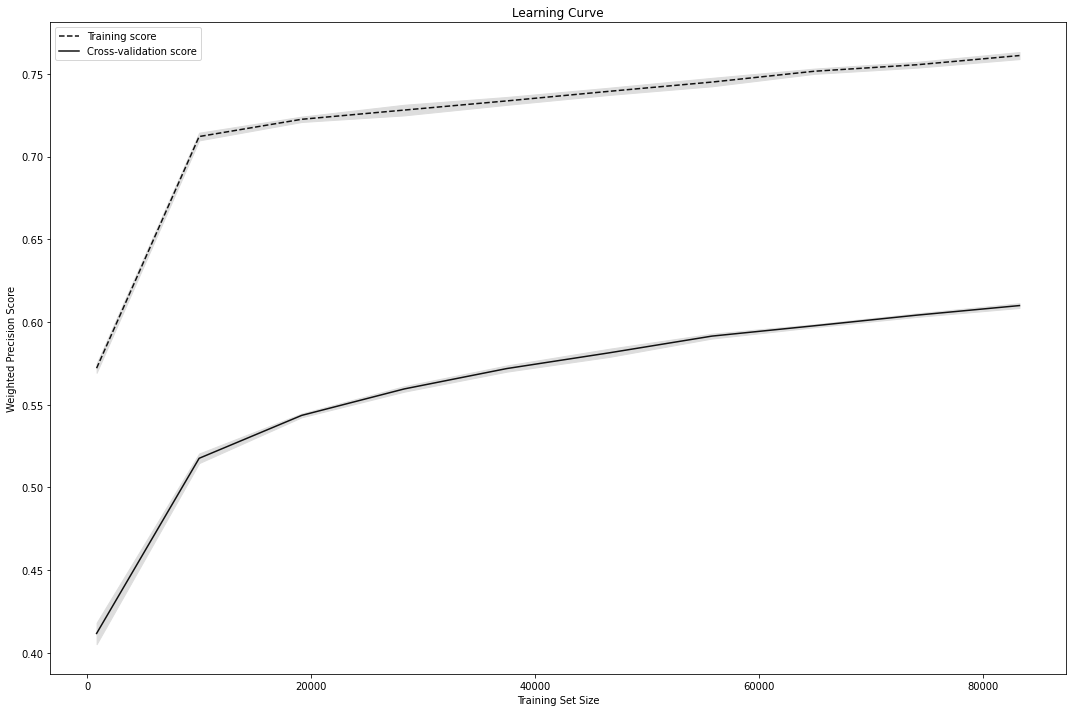

In [51]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVM_clf_tfidf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='precision_weighted',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(15,10))
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [52]:
NB_clf_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.25, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')),
    ('clf', MultinomialNB())
])
NB_clf_tfidf.fit(X_train, y_train)
NB_tfidf_pred_tr = NB_clf_tfidf.predict(X_train)

print(accuracy_score(y_train, NB_tfidf_pred_tr))
print(precision_score(y_train, NB_tfidf_pred_tr, average='weighted'))

0.6757657311290529
0.6892474885305953


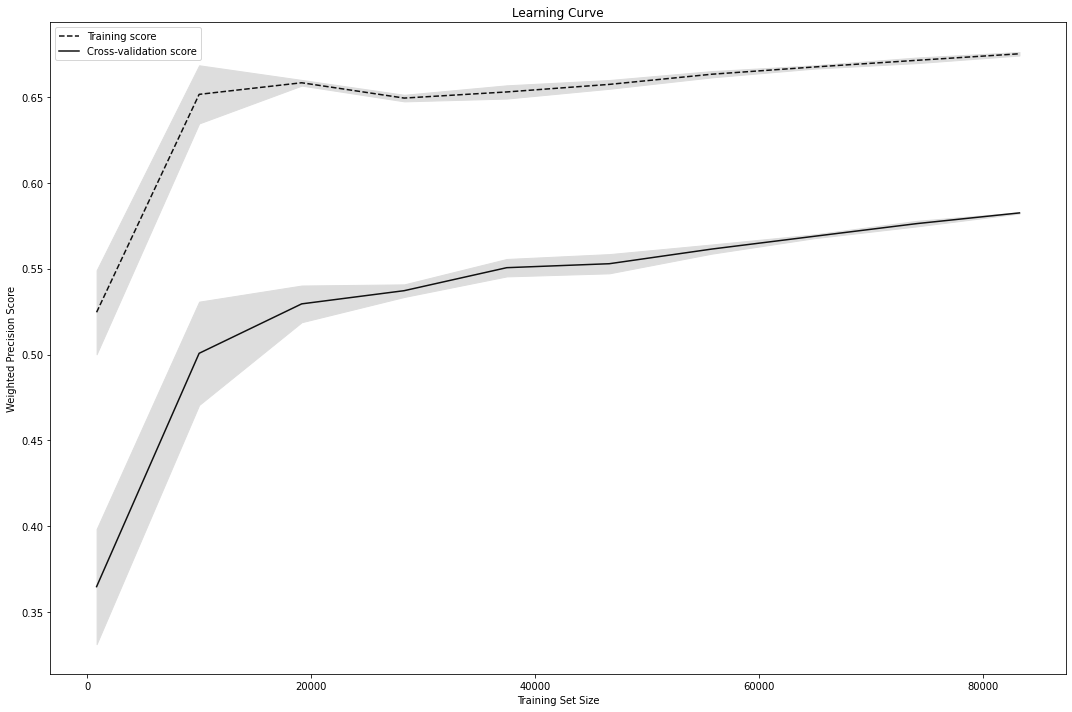

In [53]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(NB_clf_tfidf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='precision_weighted',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(15,10))
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [54]:
vect=  CountVectorizer()
X_train_cnt = vect.fit_transform(X_train)

In [55]:
def LR_param_selection(X, y, nfolds):
    Cs = [0.01, 0.1, 1, 10]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(LogisticRegression(random_state=0,max_iter=2000), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [56]:
LR_param_selection( X_train_cnt,y_train,2)

{'C': 1}

In [57]:
LR_clf_counts = Pipeline([('vect', CountVectorizer()),
                   ('clf', LogisticRegression(C=1,random_state=0, max_iter=2000)),
                  ])
LR_clf_counts.fit(X_train, y_train)
LR_cnt_pred_tr = LR_clf_counts.predict(X_train)
LR_cnt_pred_val = LR_clf_counts.predict(X_val)
LR_cnt_pred_tst = LR_clf_counts.predict(X_test)


print("precision on training: ",precision_score(y_train, LR_cnt_pred_tr, average='micro'))
print("precision on validation: ",precision_score(y_val, LR_cnt_pred_val, average='micro'))
print("precision on testing: ",precision_score(y_test, LR_cnt_pred_tst, average='micro'))

precision on training:  0.7013888888888888
precision on validation:  0.6437267717544534
precision on testing:  0.6417403562732282


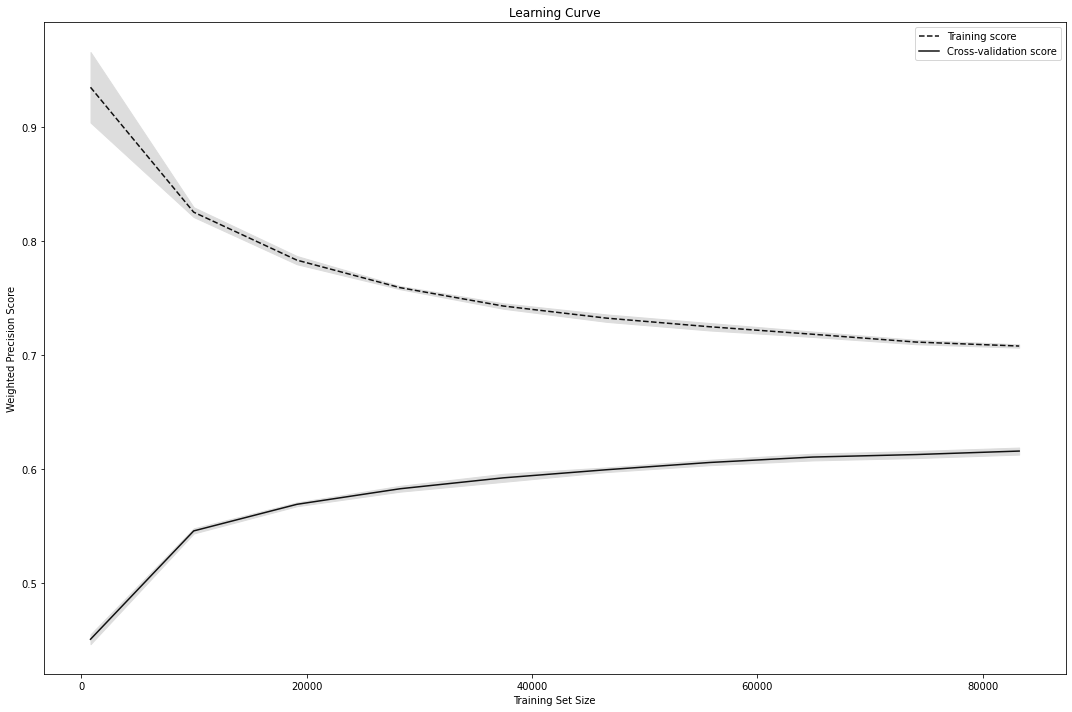

In [58]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LR_clf_counts, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='precision_weighted',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(15,10))
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [59]:
archive_train = zipfile.ZipFile('../input/sentiment-analysis-on-movie-reviews/train.tsv.zip')
archive_test = zipfile.ZipFile('../input/sentiment-analysis-on-movie-reviews/test.tsv.zip')

In [60]:
final_train = pd.read_csv("../input/sentiment-analysis-on-movie-reviews/train.tsv.zip", sep='\t')
final_test = pd.read_csv("../input/sentiment-analysis-on-movie-reviews/test.tsv.zip", sep='\t')

In [61]:
ftrain_preprocessed = preprocess (final_train,0)
ftest_preprocessed = preprocess (final_test,1)

In [62]:
id_train, X_train, y_train = ftrain_preprocessed['PhraseId'], ftrain_preprocessed['words'], ftrain_preprocessed['Sentiment']
id_test, X_test= ftest_preprocessed['PhraseId'], ftest_preprocessed['words']

In [63]:
LR_clf = Pipeline([('vect', CountVectorizer()),
                   ('clf', LogisticRegression(C=1,random_state=0, max_iter=2000)),
                  ])
LR_clf.fit(X_train , y_train)
pred_tst = LR_clf_counts.predict(X_test)

In [64]:
output=pd.DataFrame({'PhraseId' : id_test , 'Sentiment' : pred_tst })
output.to_csv('Sentiment_preds_LR.csv' , index=False)